In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})
import IPython.display as ipd # to play signals
import sounddevice as sd
import soundfile as sf

## 1. Importar os sinais

Nós precisamos importar uma resposta ao impulso $h(t)$ e um sinal anecoico, $x(t)$ - deve ser anecoico pra que não possua qualquer característica de reverberação. Note também que $x(t)$ é um sinal mono e que $h(t)$ é um sinal estéreo. Isso ocorre porque vamos simular nossa audição em uma sala. Assim, temos uma resposta ao impulso associada a orelha esquerda (canal 1 da $h(t)$) e outra associada a orelha direita (canal 2 da $h(t)$). Vamos importar e plotar os sinais. Note que eles têm diferentes durações.

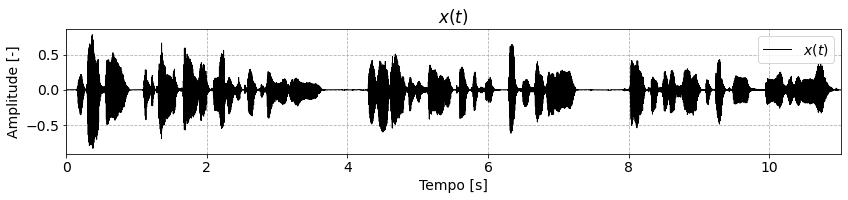

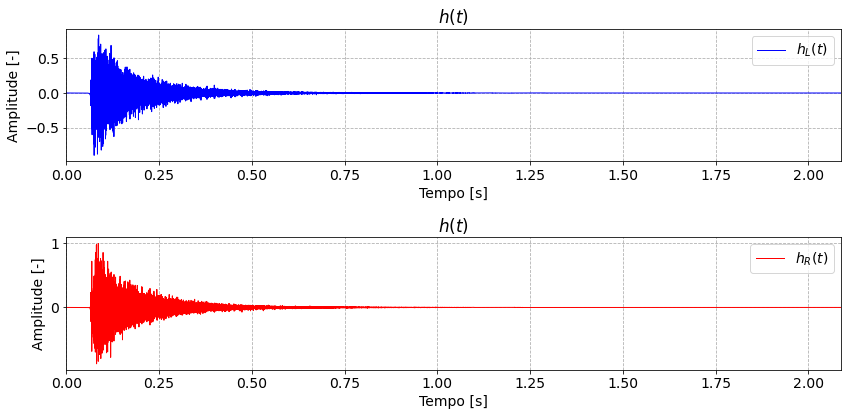

In [2]:
##### x(t) anechoic signal #################
xt, fs = sf.read('voice.wav')
time_xt = np.linspace(0, (len(xt)-1)/fs, len(xt))
##### h(t) anechoic signalimpulse response #################
ht, fs = sf.read('ht.wav')
time_ht = np.linspace(0, (len(ht)-1)/fs, len(ht))

plt.figure(figsize=(12,3))
plt.title(r'$x(t)$')
plt.plot(time_xt, xt, '-k', linewidth = 1, label = r'$x(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, time_xt[-1]))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title(r'$h(t)$')
plt.plot(time_ht, ht[:,0], '-b', linewidth = 1, label = r'$h_L(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, time_ht[-1]))

plt.subplot(2,1,2)
plt.title(r'$h(t)$')
plt.plot(time_ht, ht[:,1], '-r', linewidth = 1, label = r'$h_R(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, time_ht[-1]))
plt.tight_layout()
plt.show()

module

## 2. Vamos ouvir os sinais

Para $x(t)$ note como o sinal não possui qualquer característica de reverberação.

In [3]:
# x(t)
ipd.Audio(xt, rate=fs) # load a NumPy array

Agora as respostas ao impulso

In [84]:
# h(t)
ipd.Audio([ht[:,0], ht[:,1]], rate=fs) # load a NumPy array

## 3. Vamos operar as convoluções e plotar o resultado.

Vamos precisar operar 2 convoluções - uma para o canal esquerdo e outro para o direito

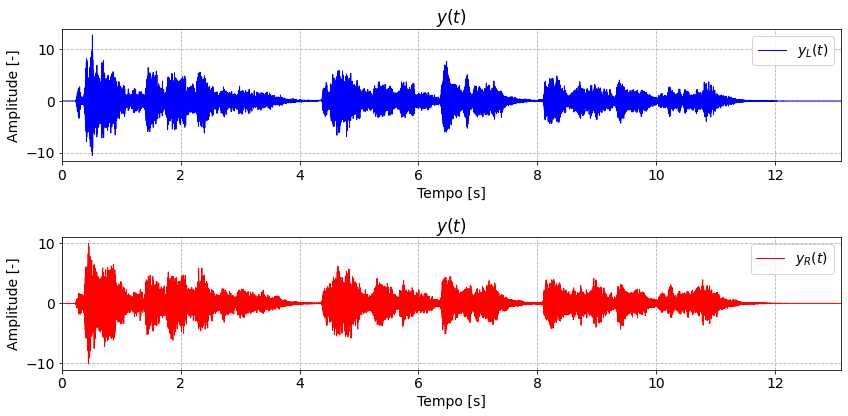

In [6]:
# Canal esquerdo
yLt = np.convolve(xt, ht[:,0])
# Canal direito
yRt = np.convolve(xt, ht[:,1])#Se você substituir o 1 por 0 aqui, vai convoluir sem a impressão de espacialidade. Faça o teste.

time_yt = np.linspace(0, (len(yRt)-1)/fs, len(yRt))

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title(r'$y(t)$')
plt.plot(time_yt, yLt, '-b', linewidth = 1, label = r'$y_L(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, time_yt[-1]))

plt.subplot(2,1,2)
plt.title(r'$y(t)$')
plt.plot(time_yt, yRt, '-r', linewidth = 1, label = r'$y_R(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, time_yt[-1]))
plt.tight_layout()
plt.show()

In [17]:
Nx = xt.shape
Nh = ht[:,0].shape
Nx[0] + Nh[0] + Nh[0] -2

670025

In [8]:
# Canal esquerdo
yyLt = np.convolve(yLt, ht[:,0])
# Canal direito
yyRt = np.convolve(yRt, ht[:,1])

In [9]:
yyLt.shape

(670025,)

## 4. Ouvindo o resultado

Note a reverberação e alguma espacialidade.

In [19]:
# y(t)
ipd.Audio([yLt, yRt], rate=fs) # load a NumPy array

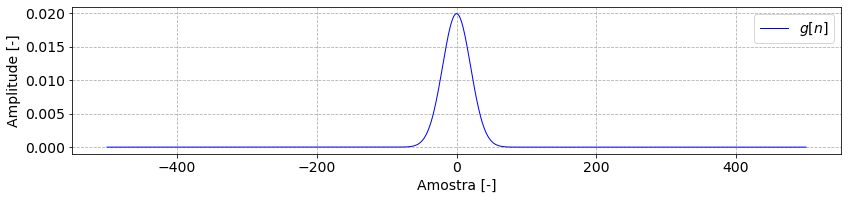

In [119]:
n_samples = 1000
std = n_samples/50
ng = np.linspace(-n_samples/2, n_samples/2, n_samples)
gk = (1/(std*np.sqrt(2*np.pi)))*np.exp(-0.5*((ng**2)/std**2))

plt.figure(figsize=(12,3))
plt.plot(ng, gk, '-b', linewidth = 1, label = r'$g[n]$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Amostra [-]')
plt.ylabel('Amplitude [-]')
plt.tight_layout()
plt.show()

In [120]:
yg = np.convolve(ht[:,0]**2, gk)
time_g = np.linspace(0, (len(yg)-1)/fs, len(yg))

In [111]:
yg.shape

(93070,)

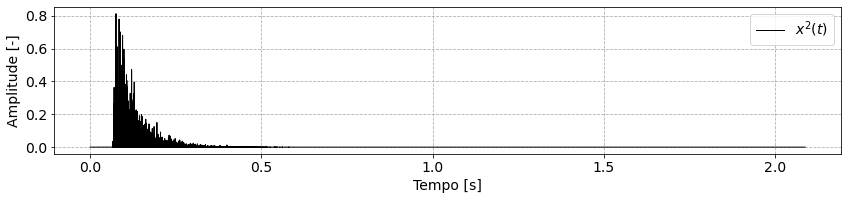

C:\Users\ericb\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


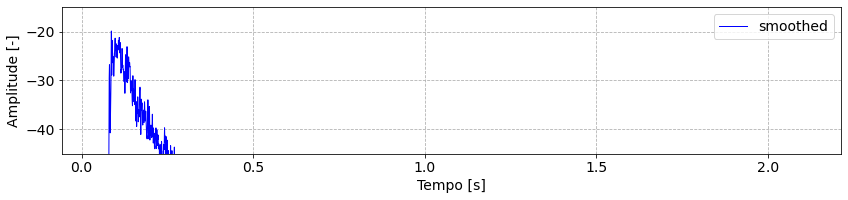

In [123]:
plt.figure(figsize=(12,3))
plt.plot(time_ht, ht[:,0]**2, '-k', linewidth = 1, label = r'$x^2(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
#plt.xlim((0, 1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,3))
plt.plot(time_g, 20*np.log10(yg), '-b', linewidth = 1, label = r'smoothed')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.ylim((-45, -15))
plt.tight_layout()
plt.show()